<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<font size=6  color=#003366> <div style="text-align: center"> Challenge 2 - Classification and mathematical morphology <br><br> 

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<div style="text-align: left">Maxence Wynen (maxence.wynen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2022-2023 </div>
<br><br>
</font>
    
</font>
<div style="text-align: left"> Students :
<font size=3  color=#003366>
<div style="text-align: left"> Lorena CLaeys (lorena.claeys@student.uclouvain.be)<br> 
<div style="text-align: left"> Rodin Koffeing (rodin.koffeing@student.uclouvain.be)
<div style="text-align: left"> Colin Gaban (colin.gaban@student.uclouvain.be)
<font size=5  color=#003366>

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> <br>
   - This assignment is due on **20th October 2022**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Goals <br></font><br>
<div style="text-align: justify"> Segmentation remains one of the main problems of image analysis. It can be handled in many applications as a classification problem. For instance, let $y_i$ denote the value (or gray level) of the $i$th pixel in the image $A$. Statistically speaking, $y_i$ is drawn from a random variable $Y$ , i.e. $y_i ∼ Y$ , which represents the gray level distribution in $A$. A segmentation process could then be to find out the class $c_k$ of pixel $i$ according to $Y$ (with $k = 1...N$ classes).



<font size=6 color=#009999> 3. Bayesian classification </font> <br>
<font size=4 color=#009999> 3.1 Expectation-Maximization (EM) algorithm </font> <br><br>
<div style="text-align: justify"> A first approach consists in building a model of the distribution of $Y$ as a mixture of simpler distributions. In this homework, we will make the assumption that each class in the image has a Gaussian distribution, and so the distribution of $Y$ will be a weighted sum of Gaussian functions. The probability to observe value $y_i$ at pixel $i$, knowing that this pixel belongs to class $k$, is :
<br>
$$p(y_i | z_i=c_k, \mu_k, \sigma_k) = \frac{1}{\sqrt{2 \pi}\sigma_k}\exp \left( -1/2 \left(\frac{y_i-\mu_k}{\sigma_k} \right)^2 \right )\qquad(1)$$
<br>
In equation (1), $z_i$ is the class of pixel $i$, and $Z$ is the class distribution in the image. Bayes’ formula uses this probability in order to find out the probability of pixel $i$ to belong to class $k$, knowing that value $y_i$ is
observed :
<br><br>
$$p(z_i = c_k | y_i, \mu_k, \sigma_k) = \frac{ p(y_i | z_i=c_k, \mu_k, \sigma_k) p(z_i=c_k) }{ \sum_{k'} p(y_i | z_i=c_{k'}, \mu_{k'}, \sigma_{k'}) p(z_i=c_{k'}) }\qquad(2)$$
<br>
<div style="text-align: justify"> In equation (2), $p(z_i = c_k)$ is the a priori probability of the $i$th pixel to belong to class $k$. In order to find out the most likely class for each pixel, we often use a ML (maximum likelihood) approach. Here, it means searching estimates of the Gaussian distribution parameters $μ_k$ and $σ_k$, denoted by $\hat{μ_k}$ and $\hat{σ_k}$. These parameters are intended to maximize a likelihood function :

$$\hat{\theta} = \arg\max_{\theta} \ell(\theta; \mathbf{y},\mathbf{z})$$

where 

$$\theta = [\mu_k,\sigma_k]_k, \qquad\mathbf{y} = [y_i]_i, \qquad\mathbf{z} = [z_i]_i$$ 

and 

$$\ell(\theta; \mathbf{y},\mathbf{z}) = \log p(\mathbf{y},\mathbf{z} | \theta) = \log \prod_{i} p(y_i,z_i| \mu_k, \sigma_k) \enspace$$

Because variable $Z$ is hidden (we are trying to estimate the class $z_i$ of each pixel $i$), we will use the EM
algorithm. This algorithm is divided in two steps :<br>
1. Step E - From an initial value of the gaussian parameters, estimate with equation (2) the probability that $z_i = c_k$ for each pixel $i$.
<br>
2. Step M - Update $\hat{\theta}$ by maximizing a modified likelihood function given by:
<br><br>
    $$\ell'(\theta; \mathbf{y}, \mathbf{z}) =  \mathrm{E}_Z\{\log(p(y | z,\theta))\}$$<br>
    $$ =  \sum_{i,k} p(z_i=c_k|y_i,\hat{\theta}) \log \left( \frac{1}{\sqrt{2 \pi} \sigma_k} \exp{\left(-\frac{1}{2} \left( \frac{y_i-\mu_k}{\sigma_k} \right)^2 \right)} \right) \enspace\qquad(3)$$    
where $p(z_i = c_k|y_i,\hat{\theta})$ have been estimated in step E.
<br> 
<br>

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
<div style="text-align: justify">
By making equal to zero derivatives with respect to $μ_k$ and $σ_k$ in the equation (3), define a way to update the
$μ_k$ and $σ_k$ at each iteration in step M. How do you understand this result ? Provide the demonstration of both formula ! You can insert a picture in the cell below. <font color=#cc3300> <br>
(Hint: at step M, the probabilities $p(z_i = c_k|y_i,\hat{\theta})$ are defined by step E and must be taken as constants in the derivative)</font> 

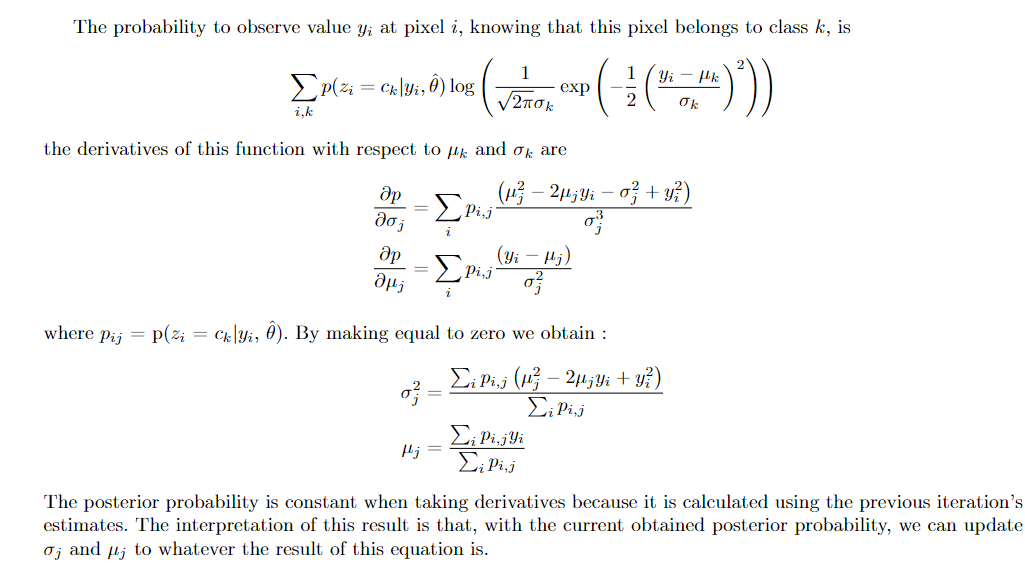

<font size=4 color=#009999> 3.2 Experiment </font> <br><br>
You will work on the following image of the brain (Brain.png). Whenever a pixel has a value 0 (background), it can be ignored by the EM algorithm.

![FIGURE 1](imgs/Brain.png "Image to segment")


<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
<div style="text-align: justify">
Code and apply the EM algorithm in order to segment the white matter, the gray matter and the cerebrospinal fluid. Find out a way to initialize $μ_k$ and $σ_k$. Let us consider for this purpose every a priori probability of each class equal to 1/3. Explain how you can get out an annotated image that estimates the class of each pixel by using the EM algorithm. Try with different initial parameters and discuss your results.

In [2]:
## Usefull functions cell 
import numpy as np
from scipy.ndimage.morphology import binary_fill_holes
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
from skimage.io import imread
from IPython import display

def getForegroundMask(originalBrainImg, backGroundValue=0):
    # Get a binary mask from a 2D array, where the pixels > 0 are set to 1
    foregroundMask = originalBrainImg > backGroundValue
    return binary_fill_holes(foregroundMask)

def getForegroundArray(originalBrainImg, foregroundMask):
    # Return a 1D array with the pixels from originalBrainImg which are under the foregroundmask
    return originalBrainImg[foregroundMask==1]


def plotHistogramWithDistribs(array, meansArray, stdsArray):
    # Plot the histogram of an array and gaussian distributions corresponding to meansArray / stdsArray
    plt.figure(figsize=(10, 10))
    hist, bin_edges = np.histogram(array, bins=255, normed=True)
    plt.bar(bin_edges[:-1], hist, align='center', width=0.005)
    plt.ylabel('Number of Pixels')
    plt.xlabel('Intensity')
    x = np.linspace(0, 1, 255)
    for (mean, std) in zip(meansArray, stdsArray):
        plt.plot(x, normal.pdf(x, mean, std), linewidth=1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

## Read and rescale image between 0 and 1
originalBrainImg = imread('Brain.png').astype(np.float64)
originalBrainImg = originalBrainImg / np.max(originalBrainImg)

## Define classes for the classification
classList = ['GreyMatter', 'WhiteMatter', 'CerebrospinalFluid']
numberOfClasses = len(classList)

## Initial conditions (You can change them)
initialMeansArray = [0.3, 0.56, 0.7]
initialStdsArray = [0.2, 0.04, 0.05]
priorProbabilities = np.ones(numberOfClasses) / numberOfClasses
pixelArray = getForegroundArray(originalBrainImg, originalBrainImg > 0)

print('initialMeansArray', initialMeansArray)
print('initialStdsArray', initialStdsArray)

initialMeansArray [0.3, 0.56, 0.7]
initialStdsArray [0.2, 0.04, 0.05]


In [4]:
def Gaussian(pixelArray, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-((pixelArray-mu)/(sigma))**2)/2)

def Expectation(pixelArray, mu, sigma, probs):
    """Returns the expectation probabilities"""
    expectations_prob = []
    for pixel in pixelArray:
        each_class = []
        for i in range(len(sigma)):
            # Calculate likelihood
            gauss = Gaussian(pixel,  mu[i], sigma[i]) * probs[i]
            each_class.append(gauss)
        # Calculate expectation
        each_class = [num/sum(each_class) for num in each_class]
        expectations_prob.append(each_class)

    return np.array(expectations_prob).T.tolist()

def Maximisation(pixelArray, posterior):
    """Returns a list of the new mu and the new sigmas optimals for each class"""
    new_mu = []
    new_sigma = []
    for i in range(len(posterior)):
        P = posterior[i]
        numerator_mu = [y * p for y, p in zip(pixelArray, P)]
        # Calculate optimal mu and sigma
        mu = sum(numerator_mu)/sum(P)
        numerator_sigma = [(y**2+ mu**2-2*mu*y) * p for y, p in zip(pixelArray, P)]
        sigma = np.sqrt(sum(numerator_sigma)/sum(P))
        new_mu.append(mu)
        new_sigma.append(sigma)
    return new_mu, new_sigma

def Log(pixelArray, mu, sigma, probs):
    """maximises the likelihodd function"""
    LogLikes = []
    for data in pixelArray:
        Likelihoods = []
        for i in range(len(mu)):
            likelihood = np.log(Gaussian(data, mu[i], sigma[i])) * probs[i]
            Likelihoods.append(likelihood)
        LogLike = sum(Likelihoods)
        LogLikes.append(LogLike)
    Incomplete = sum(LogLikes)
    return Incomplete

def EM(pixelArray, mu, sigma, probs,tol = 1e-4 ):
    """Expectation maximisation, returns a liste of the mu and the sigma for each class"""
    Incompletes = []
    delta = 1
    i = 0
    while delta > tol:
        # Calculate posterior probabilities
        posteriors = Expectation(pixelArray, mu, sigma, probs)
        # Calculate new optimal parameters
        mu = Maximisation(pixelArray, posteriors)[0]
        sigma = Maximisation(pixelArray, posteriors)[1]
        # Calculate incomplete log-likelihood with new parameters
        logs = Log(pixelArray, mu, sigma, probs)
        Incompletes.append(logs)
        if len(Incompletes) > 1:
            Current = Incompletes[len(Incompletes) - 1]
            Previous = Incompletes[len(Incompletes) - 2]
            delta = Current - Previous
        i += 1
    print(f"{i} iterations")
    return mu, sigma, probs

mu_sigma = EM(pixelArray, initialMeansArray, initialStdsArray, priorProbabilities)

7 iterations


In [5]:
from scipy.ndimage.morphology import binary_fill_holes
from scipy import ndimage

#find the intersection between the gaussians
Norm = []
x = np.linspace(0, 1, 255)
Norm.append(x)
for i in range(len(mu_sigma[0])):
    Norm.append(normal.pdf(x, mu_sigma[0][i], mu_sigma[1][i]))

intersection = []
for i in range(1, len(Norm)-1):
    for k in range(len(x)-1):
        if abs(Norm[i][k]<Norm[i+1][k]):
            intersection.append(Norm[0][k])
            i = i+1
            if i ==3 :
                break

#give the pixels's brain 3 differents color in function of the class
NewBrainImg = np.zeros(originalBrainImg.shape)
for i in range(originalBrainImg.shape[0]):
    for j in range(originalBrainImg.shape[1]):
        if originalBrainImg[i][j] < intersection[0]:
            NewBrainImg[i][j] = 1
        if intersection[0] < originalBrainImg[i][j] < intersection[1]:
            NewBrainImg[i][j] = 50
        if originalBrainImg[i][j] > intersection[1]:
            NewBrainImg[i][j] = 100

print('initialMeansArray', initialMeansArray)
print('initialStdsArray', initialStdsArray)

initialMeansArray [0.3, 0.56, 0.7]
initialStdsArray [0.2, 0.04, 0.05]


C:\Users\colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


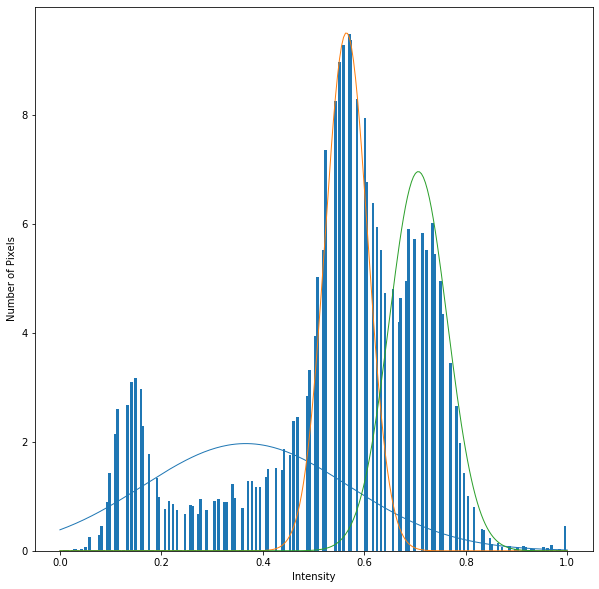

In [39]:
plotHistogramWithDistribs(pixelArray, mu_sigma[0], mu_sigma[1])
plt.show()

<font color=#C0392B> **Answer** </font> <br> Explain how you can get out an annotated image that estimates the class of each pixel by using the EM algorithm. Try with different initial parameters and discuss your results.

The objective is to separate the pixels according to their color. To do this we identify the color of each of them and define, statistically, 3 color classes. We then define, for our 3 classes, 3 Gaussian functions whose mean and standard deviation parameters are first arbitrarily defined in the form of initial conditions. Each iteration, we modify our parameters according to the classes of the pixels. The objective is therefore to get closer and closer to the real parameters that define the different majority colors in the image.

When initial conditions that are too far from the real parameters are used, the number of iterations and the calculation time increase. Moreover we obtain results which try towards these initial conditions but maximized thanks to the code. The further the initial conditions are, the less the Gaussians tend towards the values of the image.

<font size=6 color=#009999> 4. Mathematical Morphology <br></font><br>
Segmentation is often used to define the contour of organs. However, this requires to have rather smooth and simple masks, which is barely the case with methods like the EM algorithm, as no spatial criterion is used during classification.

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
<div style="text-align: justify"> In this exercise, we ask you to refine the segmentation of the white matter computed with the EM method, by removing outliers in homogeneous regions in the mask (small holes and peaks). Show that mathematical morphology operators can solve this problem by using different structuring elements.

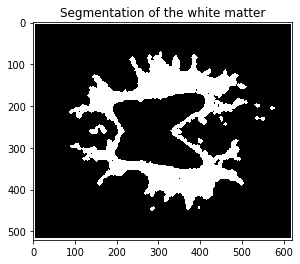

In [44]:
#create the whitte matter image by using a mask
whitte_matter = np.zeros(NewBrainImg.shape)
for i in range(NewBrainImg.shape[0]):
    for j in range(NewBrainImg.shape[1]):
        if NewBrainImg[i][j] == 1:
            whitte_matter[i][j] = 1
        if NewBrainImg[i][j] == 50:
            whitte_matter[i][j] = 1

#morphology fonction. We only use 4 iterations for the reasons discussed below
whitte_matter = ndimage.morphology.binary_closing(whitte_matter, iterations = 4, mask = NewBrainImg ).astype(int)

inverse = np.zeros(NewBrainImg.shape)
for i in range(NewBrainImg.shape[0]):
    for j in range(NewBrainImg.shape[1]):
        if whitte_matter[i][j] == 0:
            inverse[i][j] = 1

plt.imshow(inverse, 'gray')
plt.title('Segmentation of the white matter')
plt.show()

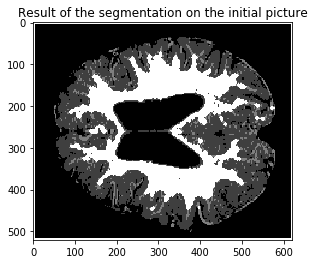

In [46]:
#Put the white matter in the brain after the segmentation 
for i in range(NewBrainImg.shape[0]): 
    for j in range(NewBrainImg.shape[1]):
        if inverse[i][j] == 1:
            NewBrainImg[i][j] = 200
plt.imshow(NewBrainImg, 'gray')
plt.title('Result of the segmentation on the initial picture')
plt.show()

We can refine the segmentation of the white matter computed with the
EM method by removing outliers in homogeneous regions in the mask (small holes and peaks).
Mathematical morphology operators can solve this problem. The closing and opening operators combine
two types of operation : erosion and dilation. For the closing, we first apply the dilation and then the
erosion. With this method, two parts separated by a noisy pixel are linked. For the opening, we first apply
the erosion and then the dilation. The result is the folowing : noisy and remote pixels disappear. 
The cost of using this function is the loss of some informations from the original image. We don't always know if an outlier is just a noise error or if it's actually part of the image but just a bit separated from the other points.
This is why it is important to limit the iterations in order not to worsen the quality. We limited ourselves to 4 iterations.